# Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import ptitprince as pt
from rdkit import Chem
from rdkit.Chem import Descriptors, Draw, PandasTools, MolFromSmiles

# Load data file

In [2]:
file = pd.read_csv('unique_smiles_id.csv')

In [3]:
data_df = file[['SMILES', 'Year']]

In [4]:
len(data_df) 

10718647

In [5]:
df = pd.read_csv('properties_check.csv')

In [6]:
df['Year'] = data_df['Year']

In [7]:
len(df) 

10695637

In [8]:
df.head(2)

,Smiles,molecular_weight,logp,n_hba,n_hbd,rotatable_bonds,TPSA,fsp3,n_chiral_centres,Year
0,C[C@H](CS)C(=O)N1CCC[C@H]1C(O)=O,217.077264,0.6279,3.0,2.0,3.0,57.61,0.777778,2.0,2015
1,O=C(O)\C=C/C(=O)O.CCOC(=O)[C@H](CCC1=CC=CC=C1)...,492.210781,1.3164,7.0,4.0,11.0,170.54,0.458333,3.0,2015


# Getting Molecular descriptors

# formatting calculated values

In [9]:
pd.options.display.float_format = '{:.2f}'.format

# concatenating dataframes

In [10]:
def define_year(year):
    df_year = df[(df['Year'] == year)]
    return df_year

In [11]:
def year_range(year1, year2):
    concat_df = None
    for year in range(year1, year2):
        current_df = define_year(year)

        if year == '2015':
            df = data_df[(data_df['Year'] == year)]
            concat_df = current_df
        else:
            concat_df = pd.concat([concat_df, current_df])
            concat_df.drop_duplicates(keep='first', inplace=True)
            concat_df.reset_index(drop=True, inplace=True)
    return concat_df

# Year 2015-2017

In [12]:
concat_df_15_16_17 = year_range(2015, 2018)

In [13]:
concat_df_15_16_17['concat_years'] = '2015-2017'

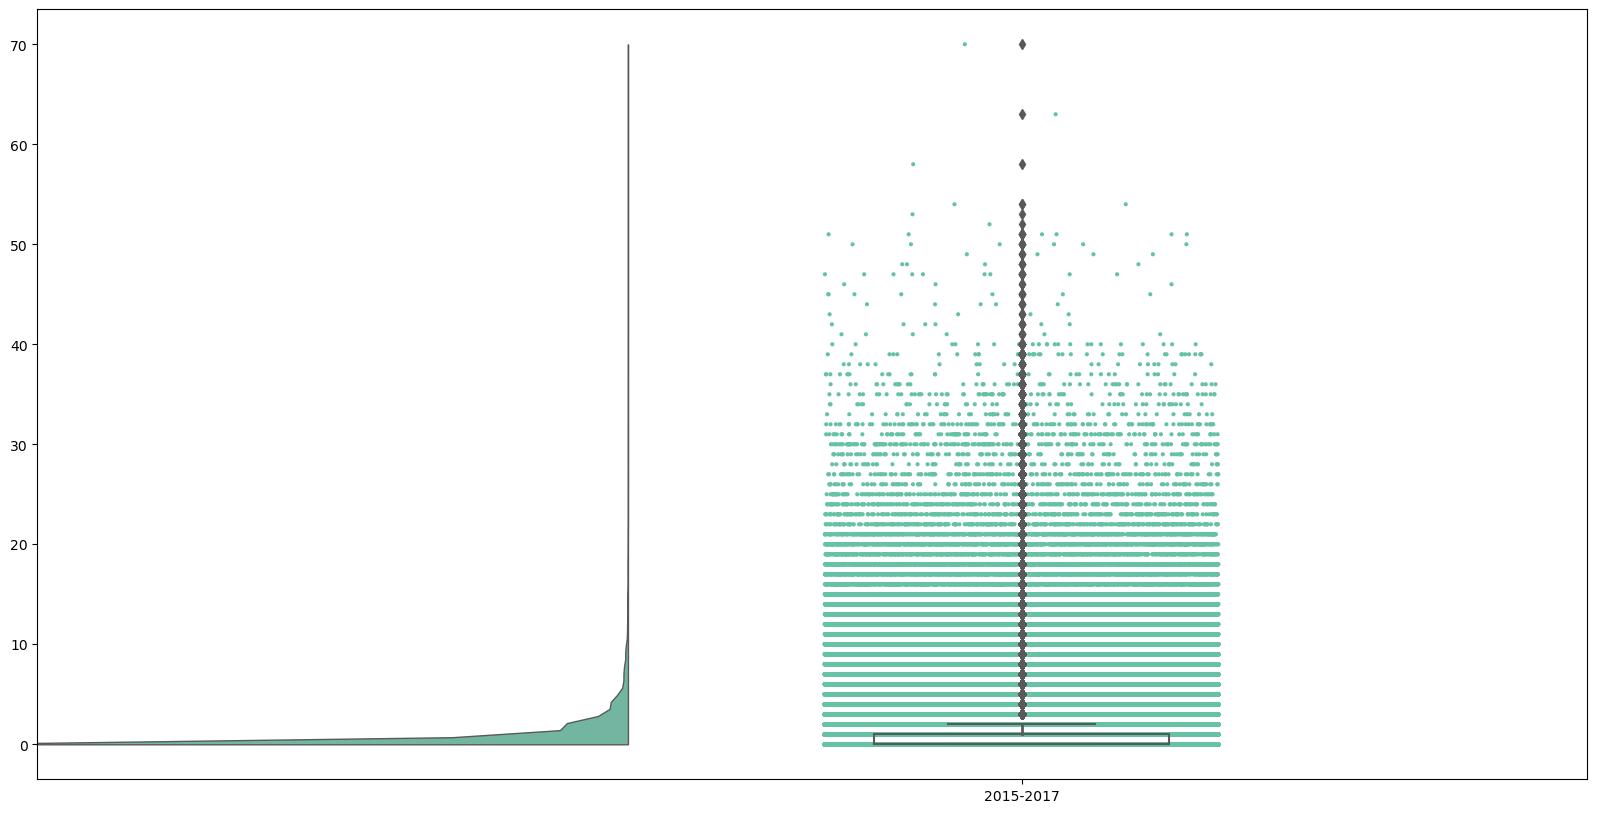

In [14]:
pal = "Set2"
dx = list(concat_df_15_16_17["concat_years"]); dy = list(concat_df_15_16_17["n_chiral_centres"])
f, ax = plt.subplots(figsize=(20, 10))

ax=pt.RainCloud(x = dx, y = dy, palette = pal, ax = ax)

In [15]:
concat_df_15_16_17 = concat_df_15_16_17[['molecular_weight', 'logp', 'n_hba', 'n_hbd', 'rotatable_bonds', 'TPSA', 'fsp3', 'n_chiral_centres']]

In [16]:
concat_df_15_16_17.describe()

,molecular_weight,logp,n_hba,n_hbd,rotatable_bonds,TPSA,fsp3,n_chiral_centres
count,5820172.00,5820172.00,5820172.00,5820172.00,5820172.00,5820172.00,5820172.00,5820172.00
mean,430.97,4.20,5.26,1.56,6.22,81.43,0.39,0.71
std,206.22,3.53,3.37,1.88,5.95,60.34,0.25,1.83
min,100.01,-46.55,0.00,0.00,0.00,0.00,0.00,0.00
25%,295.12,2.29,3.00,0.00,3.00,46.09,0.21,0.00
50%,409.16,3.65,5.00,1.00,5.00,74.02,0.36,0.00
75%,515.24,5.21,7.00,2.00,8.00,103.85,0.53,1.00
max,5974.63,159.80,108.00,80.00,358.00,1946.40,1.00,70.00


# Year 2018-2020

In [17]:
concat_df_18_19_20 = year_range(2018, 2021)

In [18]:
concat_df_18_19_20['concat_years'] = '2018-2020'

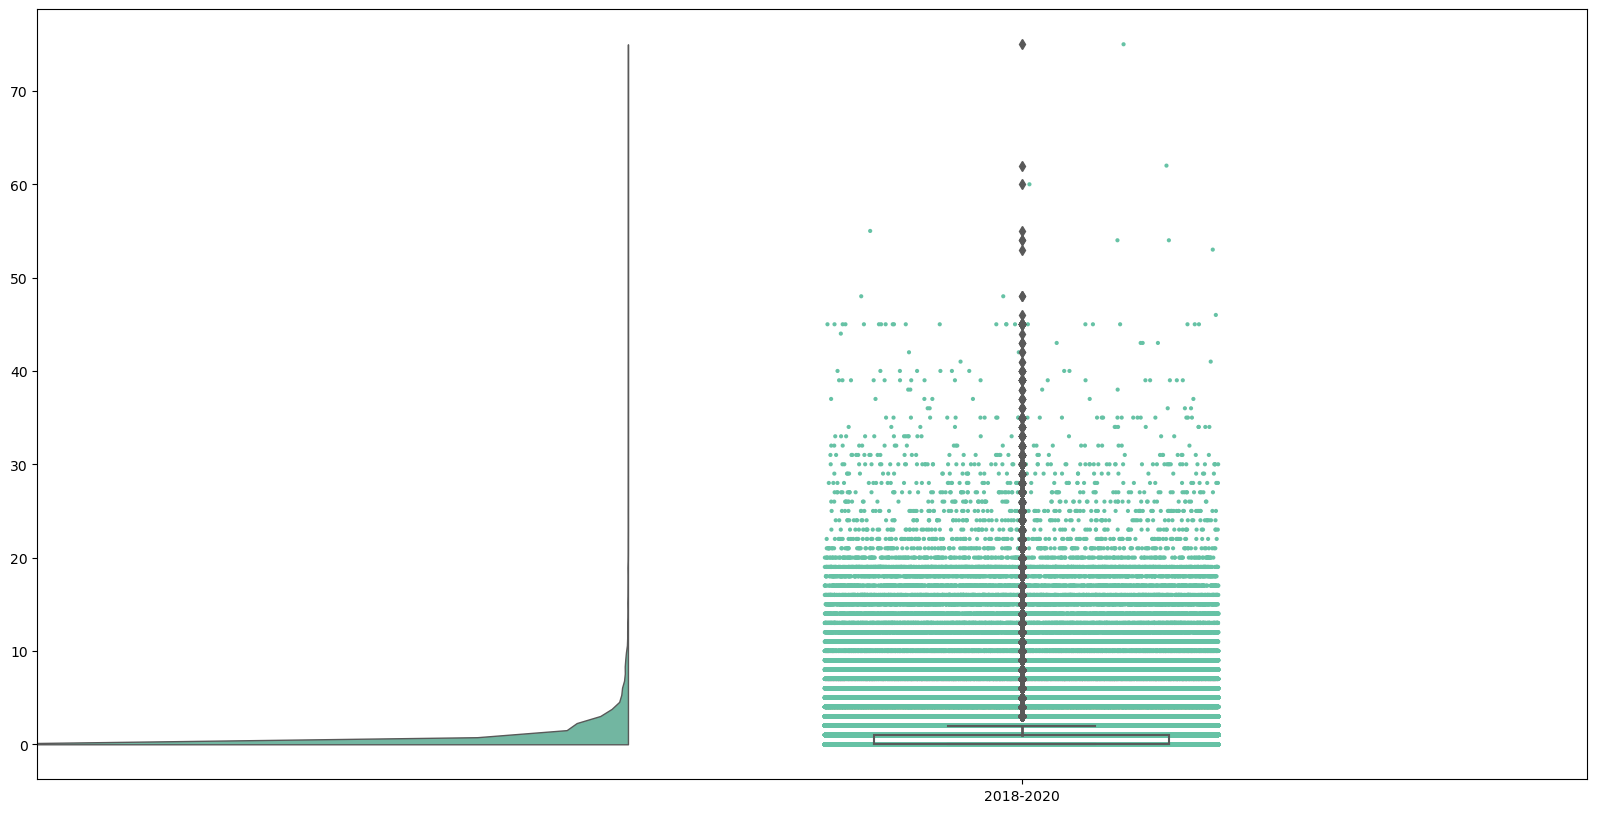

In [19]:
pal = "Set2"
dx = list(concat_df_18_19_20["concat_years"]); dy = list(concat_df_18_19_20["n_chiral_centres"])
f, ax = plt.subplots(figsize=(20, 10))

ax=pt.RainCloud(x = dx, y = dy, palette = pal, ax = ax)

In [20]:
concat_df_18_19_20 = concat_df_18_19_20[['molecular_weight', 'logp', 'n_hba', 'n_hbd', 'rotatable_bonds', 'TPSA', 'fsp3', 'n_chiral_centres']]

In [21]:
concat_df_18_19_20.describe()

,molecular_weight,logp,n_hba,n_hbd,rotatable_bonds,TPSA,fsp3,n_chiral_centres
count,3051374.00,3051374.00,3051374.00,3051374.00,3051374.00,3051374.00,3051374.00,3051374.00
mean,464.50,4.73,5.51,1.57,6.53,82.79,0.39,0.68
std,229.99,4.24,3.50,1.87,5.94,61.69,0.25,1.76
min,100.07,-44.80,0.00,0.00,0.00,0.00,0.00,0.00
25%,314.11,2.44,3.00,0.00,3.00,44.89,0.22,0.00
50%,431.11,3.83,5.00,1.00,5.00,74.69,0.38,0.00
75%,553.28,5.59,7.00,2.00,8.00,105.74,0.54,1.00
max,4757.54,74.86,102.00,70.00,300.00,1988.73,1.00,75.00


# Year 2021-2022

In [22]:
concat_df_21_22 = year_range(2021, 2023)

In [23]:
concat_df_21_22['concat_years'] = '2021-2022'

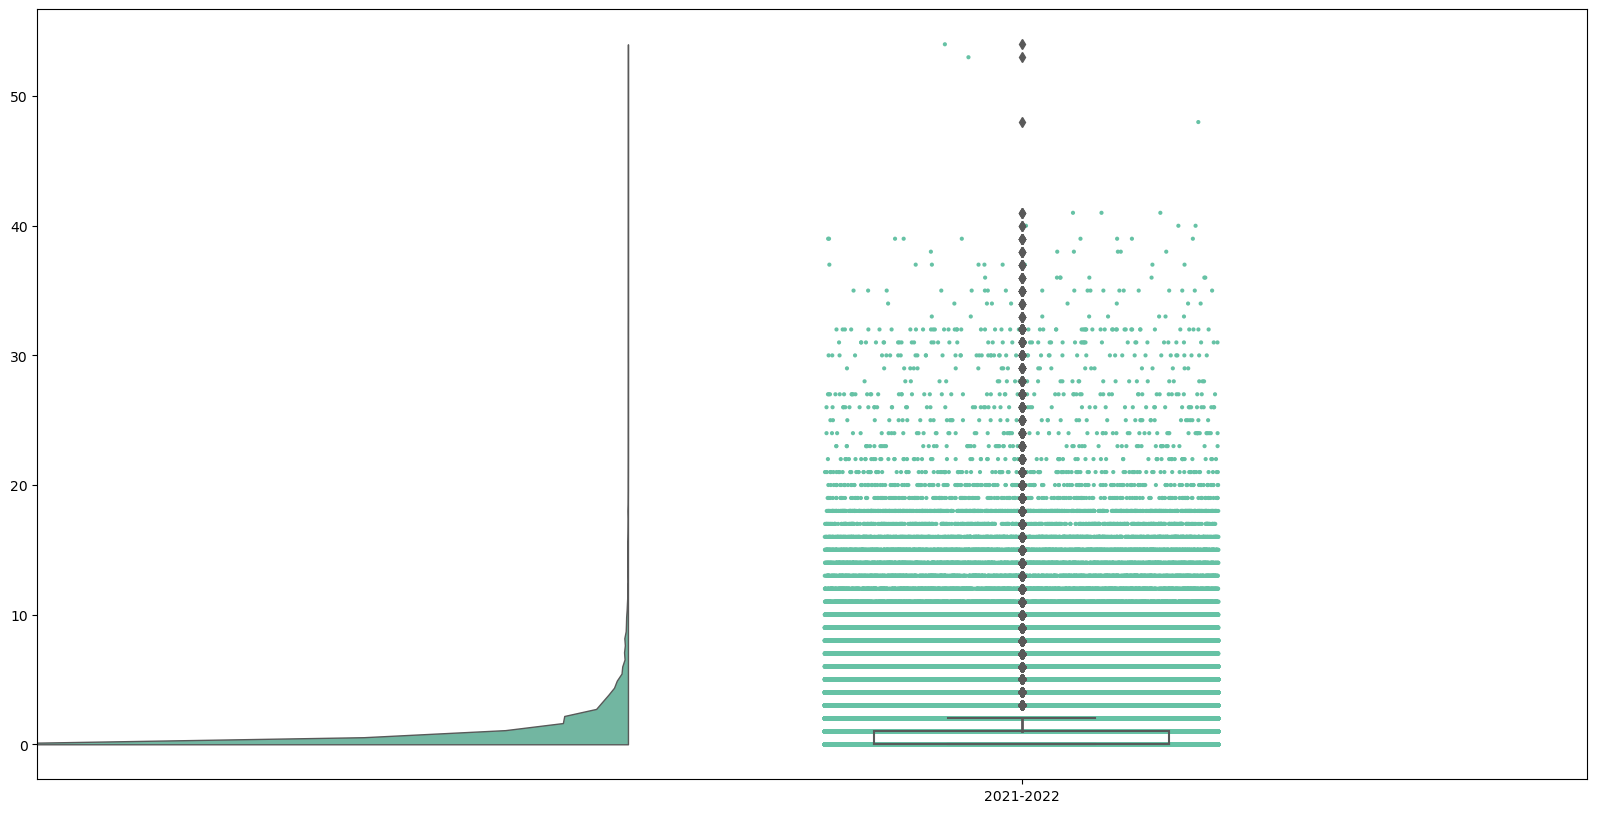

In [24]:
pal = "Set2"
dx = list(concat_df_21_22["concat_years"]); dy = list(concat_df_21_22["n_chiral_centres"])
f, ax = plt.subplots(figsize=(20, 10))

ax=pt.RainCloud(x = dx, y = dy, palette = pal, ax = ax)

In [25]:
concat_df_21_22 = concat_df_21_22[['molecular_weight', 'logp', 'n_hba', 'n_hbd', 'rotatable_bonds', 'TPSA', 'fsp3', 'n_chiral_centres']]

In [26]:
concat_df_21_22.describe()

,molecular_weight,logp,n_hba,n_hbd,rotatable_bonds,TPSA,fsp3,n_chiral_centres
count,1824091.00,1824091.00,1824091.00,1824091.00,1824091.00,1824091.00,1824091.00,1824091.00
mean,486.09,5.10,5.66,1.56,6.61,83.09,0.39,0.72
std,237.43,4.49,3.64,1.87,6.13,62.96,0.25,1.78
min,100.07,-32.89,0.00,0.00,0.00,0.00,0.00,0.00
25%,328.01,2.54,3.00,0.00,3.00,43.60,0.21,0.00
50%,449.12,3.98,5.00,1.00,5.00,74.60,0.38,0.00
75%,590.25,5.91,7.00,2.00,8.00,106.78,0.53,1.00
max,5745.26,152.98,106.00,58.00,399.00,1779.38,1.00,54.00
